<a href="https://colab.research.google.com/github/flaakira/Alura/blob/master/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
!pip install scipy==1.2 --upgrade

     |████████████████████████████████| 26.6MB 171kB/s 
ERROR: tensorflow 2.2.0rc3 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [0]:
dados_projeto = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [31]:
dados = pd.DataFrame(dados_projeto)
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [35]:
dados.columns

Index(['Y', 'X'], dtype='object')

In [0]:
renomear = {'Y':'Litros', 
            'X':'temperatura'}

In [0]:
dados = dados.rename(columns=renomear)

In [40]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [41]:
dados.describe()

,Litros,temperatura
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

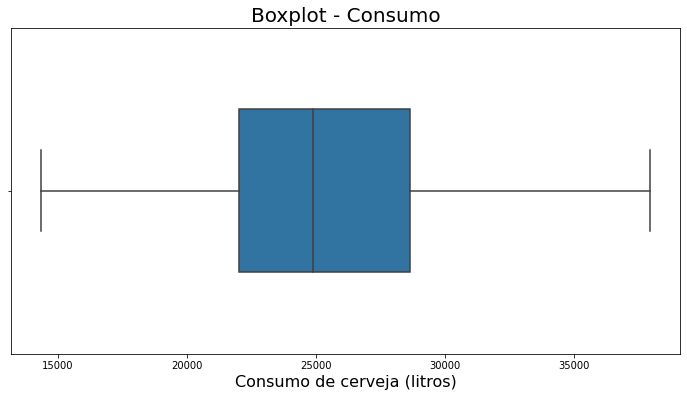

In [81]:
ax = sns.boxplot(data=dados, x='Litros', orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot - Consumo', fontsize=20)
ax.set_xlabel('Consumo de cerveja (litros)', fontsize=16)
ax

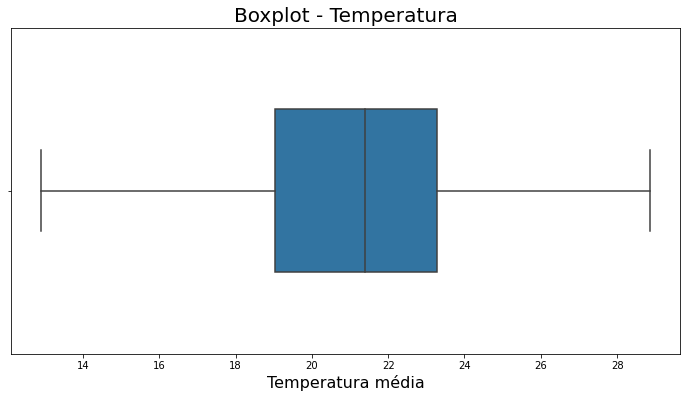

In [82]:
ax = sns.boxplot(data=dados, x='temperatura', orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot - Temperatura', fontsize=20)
ax.set_xlabel('Temperatura média', fontsize=16)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

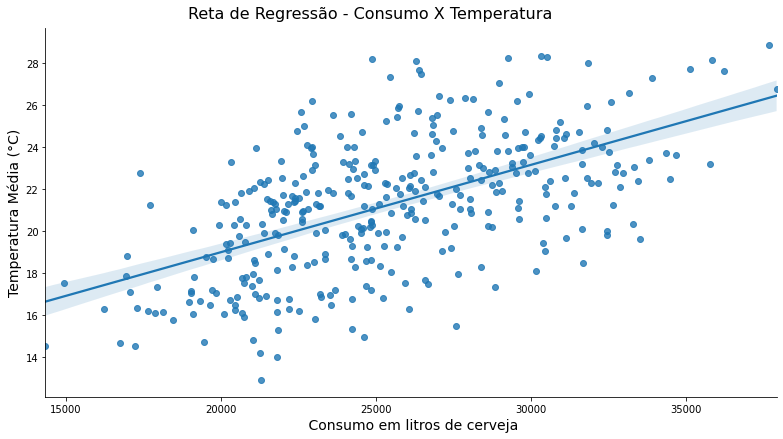

In [85]:
ax = sns.lmplot(x="Litros", y="temperatura", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels(" Consumo em litros de cerveja", fontsize=14)
ax.set_ylabels("Temperatura Média (°C)", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [51]:
dados.corr()

,Litros,temperatura
Litros,1.000000,0.574615
temperatura,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, correlacao moderada

É possível quantificar a intensidade dessa relação?

Resp.: Sim,  A partir do coeficiente de correlação

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: nao

### Prepare os dados para estimar um modelo de regressão linear simples

In [0]:
Y = dados.Litros
X = sm.add_constant(dados.temperatura)

### Estime o modelo de regressão linear simples

In [0]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [109]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 Litros   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.87e-33
Time:                        17:26:22   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8528.9073   1275.363      6.687      

### Obtenha o $Y$ previsto

In [110]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Litros,temperatura,Y_previsto,Residuos
0,25461,27.30,30229.200544,6.048873
1,28972,27.02,30006.633434,4.310458
2,30814,24.82,28257.891852,1.345319
3,29799,23.98,27590.190521,0.926934
4,28900,23.82,27463.009315,1.140365


In [111]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Litros,temperatura,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


In [112]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Litros,temperatura,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
...,...,...,...,...
360,32307,24.00,27606.088172,4700.911828
361,26095,22.64,26525.047922,-430.047922
362,22309,21.68,25761.960686,-3452.960686
363,20467,21.38,25523.495925,-5056.495925


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [114]:
resultado_regressao.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [115]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Litros,temperatura,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

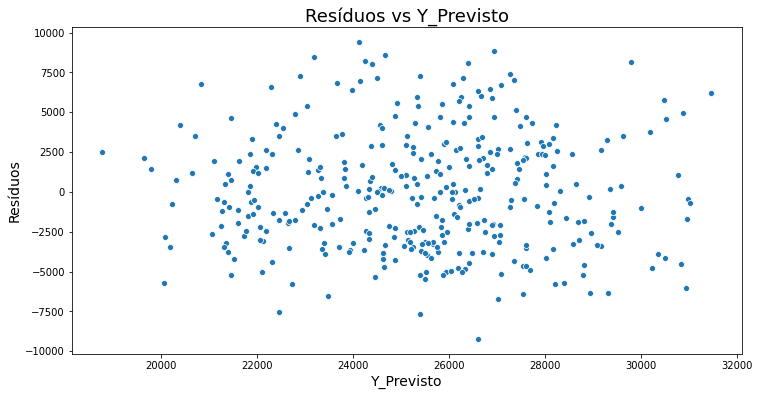

In [116]:
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

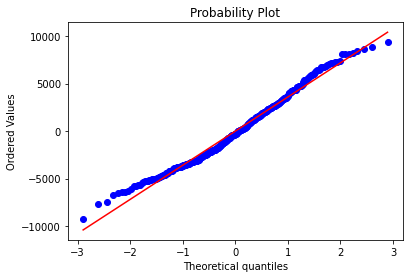

In [118]:
(_, (_, _, _)) = probplot(dados.Residuos, plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [119]:
SQE = resultado_regressao.ssr
SQE

4718394688.067693

In [122]:
SQR = resultado_regressao.ess
SQR

2325899486.7377863

In [121]:
SQT = SQR + SQE
SQT

7044294174.805479

In [123]:
R2 = SQR / SQT
R2

0.33018204933243206

In [124]:
resultado_regressao.rsquared

0.330182049332432